# Reading ImageNet from tfrecord files using TensorFlow's `tf.data` API

Here we will use TensorFlow's [`tf.data` API](https://www.tensorflow.org/guide/data) to read the ImageNet dataset stored in tfrecord files.

In [1]:
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

2022-10-12 10:22:35.805899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 10:22:35.963226: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-12 10:22:37.069251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /apps/daint/UES/6.0.UP04/sandboxes/sarafael/software/cuDNN/8.1.0/lib:/opt/nvidia/hpc_sdk/Linux_x86_64/21.5/cuda/11.3/compat:/usr/local/cuda-11.3/compat:/opt/nvidia/hpc_sdk/Linux_x86_64/21.5/math_libs/11.3/lib64:/

In [2]:
tfrec_files = glob.glob(f'/scratch/snx3000/datasets/imagenet/ILSVRC2012_1k/train/*')

In [3]:
def decode(serialized_example):
    example = tf.io.parse_single_example(
        serialized_example,
        features={
            'image/encoded': tf.io.FixedLenFeature([], tf.string),
            'image/class/label': tf.io.FixedLenFeature([], tf.int64),
        })
    image = tf.image.decode_jpeg(example['image/encoded'], channels=3)
    image = tf.image.resize_with_crop_or_pad(image, 224, 224)
    label = example['image/class/label'] - 1  # -> [0-999]
    return image, label

In [4]:
dataset = tf.data.TFRecordDataset(tfrec_files)
dataset = dataset.map(decode)
dataset = dataset.batch(64)

2022-10-12 10:22:56.818875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 10:22:57.404327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15391 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:02:00.0, compute capability: 6.0


In [5]:
for imgs, labels in dataset.take(10):
    pass

In [6]:
imgs.shape

TensorShape([64, 224, 224, 3])

In [7]:
labels.shape

TensorShape([64])

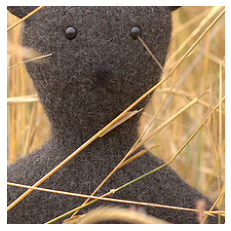

In [8]:
plt.imshow(imgs[17])
plt.axis('off')
plt.show()